# Linear Regression with One Variable, implemented by numpy

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## LOAD DATASET

In [2]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [7]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

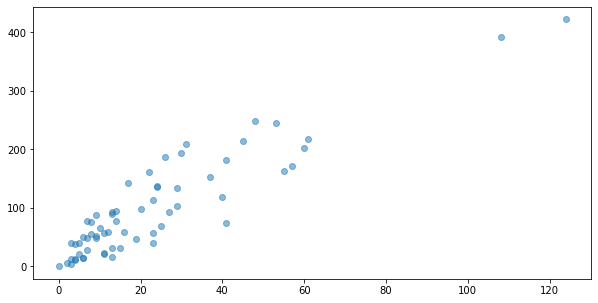

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(raw_X, y, 'o', alpha=0.5)

In [11]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [12]:
np.ones((len(raw_X), 1))[:3]

array([[1.],
       [1.],
       [1.]])

In [13]:
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [25]:
w = np.random.normal((2, 1))
w

array([2.38447823, 0.7945639 ])

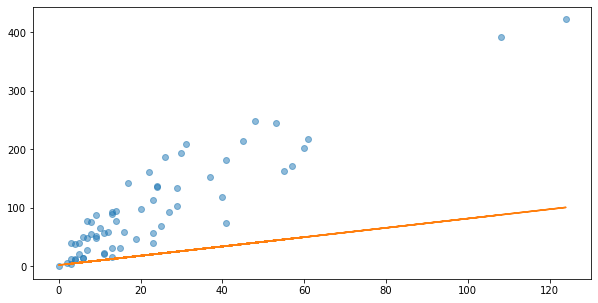

In [26]:
plt.figure(figsize=(10, 5))
y_predict = np.dot(X, w)
plt.plot(raw_X, y, "o", alpha=0.5)
plt.plot(raw_X, y_predict)

## HYPOTHESIS and COST FUNCTION

In [27]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [28]:
h = hypothesis_function(X, w)

In [30]:
def cost_function(h, y):
    return (1 / (2*len(y))) * np.sum((h-y)**2)

In [33]:
h = hypothesis_function(X, w)
cost_function(h, y)

5477.400032458589

## GRADIENT DESCENT

In [34]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        theta = np.array([t0, t1])
        
        if i % 10 == 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)
    
    return theta, theta_list, cost_list

## DO Linear regression with GD

In [35]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta: ", theta)
print("cost: ", cost_function(hypothesis_function(X, theta), y))

theta:  [19.88265985  3.41623815]
cost:  625.3741263855673


In [36]:
theta_list[:10]

[[2.3844782307363217, 0.7945638960461899],
 [2.462081757235829, 3.9776997890541774],
 [2.5465155878094983, 3.790566613383827],
 [2.6345028825583525, 3.788666759030915],
 [2.7220464715946697, 3.786776485336721],
 [2.8091485924546733, 3.784895743987382],
 [2.8958114713910548, 3.7830244869128222],
 [2.982037323429871, 3.781162666285377],
 [3.0678283524271635, 3.779310234518567],
 [3.153186751125282, 3.777467144265886]]

In [39]:
theta_list = np.array(theta_list)

In [40]:
cost_list[:5]

[5477.400032458589,
 721.3459523908733,
 702.3415667811563,
 701.5672235379161,
 700.8006703787087]

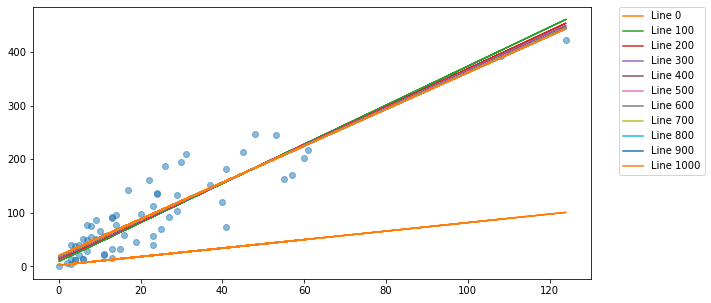

In [41]:
plt.figure(figsize=(10,5))

y_predict_step = np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X, y, "o", alpha=0.5)
for i in range(0, len(cost_list), 100):
    plt.plot(raw_X ,y_predict_step[:, i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()